# Fantastic CUSP And Where To Find It

In [22]:
import geopandas as gpd
import numpy as np
import pylab as pl
%pylab inline
import pandas as pd
import sys
import os
from shapely.geometry import Point, Polygon
from fiona.crs import from_epsg
import shapely

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<br/><br/>
## 1. Load Census Blocks Data

#### The CB Data is from [Political and Administrative Districts](http://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page). 
#### Census track data: [Census Blocks 2010 (Clipped to Shoreline) - GeoJSON](http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nycb2010/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson), [Census Blocks 2010 (Clipped to Shoreline) - ShapeFile](http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip)

In [23]:
print os.getenv("PUIDATA")

/home/cusp/chl557/PUIdata


In [24]:
FilePath = os.getenv("PUIDATA") + "/HW11"

In [25]:
if not os.path.isfile(os.getenv("PUIDATA") + "/nycb2010_16d/nycb2010.shp"): 
    os.system("! wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip")
    os.system("! unzip nycb2010_16d.zip")
    os.system("cp -rf nycb2010_16d*"+ " "+ FilePath)

In [26]:
cb = gpd.GeoDataFrame.from_file(FilePath+'/nycb2010_16d/nycb2010.shp')
# Change coordinate system from epsg=2263 to epsg=4326
cb = cb.to_crs(epsg=4326)

In [27]:
print cb.BoroName.unique()

[u'Staten Island' u'Manhattan' u'Brooklyn' u'Bronx' u'Queens']


In [28]:
# Select all the CTs in Brooklyn
cb_bk = cb[cb.BoroName == 'Brooklyn']
cb_bk = cb_bk.reset_index(drop = True)

<br/>
## 2. Location of CUSP

#### The Long & Lat of One Metro Tech (CUSP) is (-73.9888305, 40.6931259) on Google Map and map it on geometry

In [33]:
CUSP = Point(-73.9888305, 40.6931259)
CUSP = gpd.GeoSeries(CUSP)
CUSP.crs = from_epsg(4326)
#CUSP.geometry.ix[0]

## 3. Find Out In Which Census Tract CUSP is Located 

In [30]:
# Use CTs intersects CUSP
cb_CUSP = cb_bk[cb_bk.geometry.intersects(CUSP.geometry.ix[0])]
cb_CUSP

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
9058,30011001002,3,Brooklyn,1002,001100,462604.348339,2917.605512,POLYGON ((-73.98716132813909 40.69496169589653...


<br/>
## 4.Visualize CUSP in Brooklyn Census Tracts

#### Draw one every ten polygons in Brooklyn

In [31]:
index = np.arange(0,len(cb_bk),10)
cb_bk_plot = cb_bk.iloc[index, :]
len(cb_bk_plot)

969

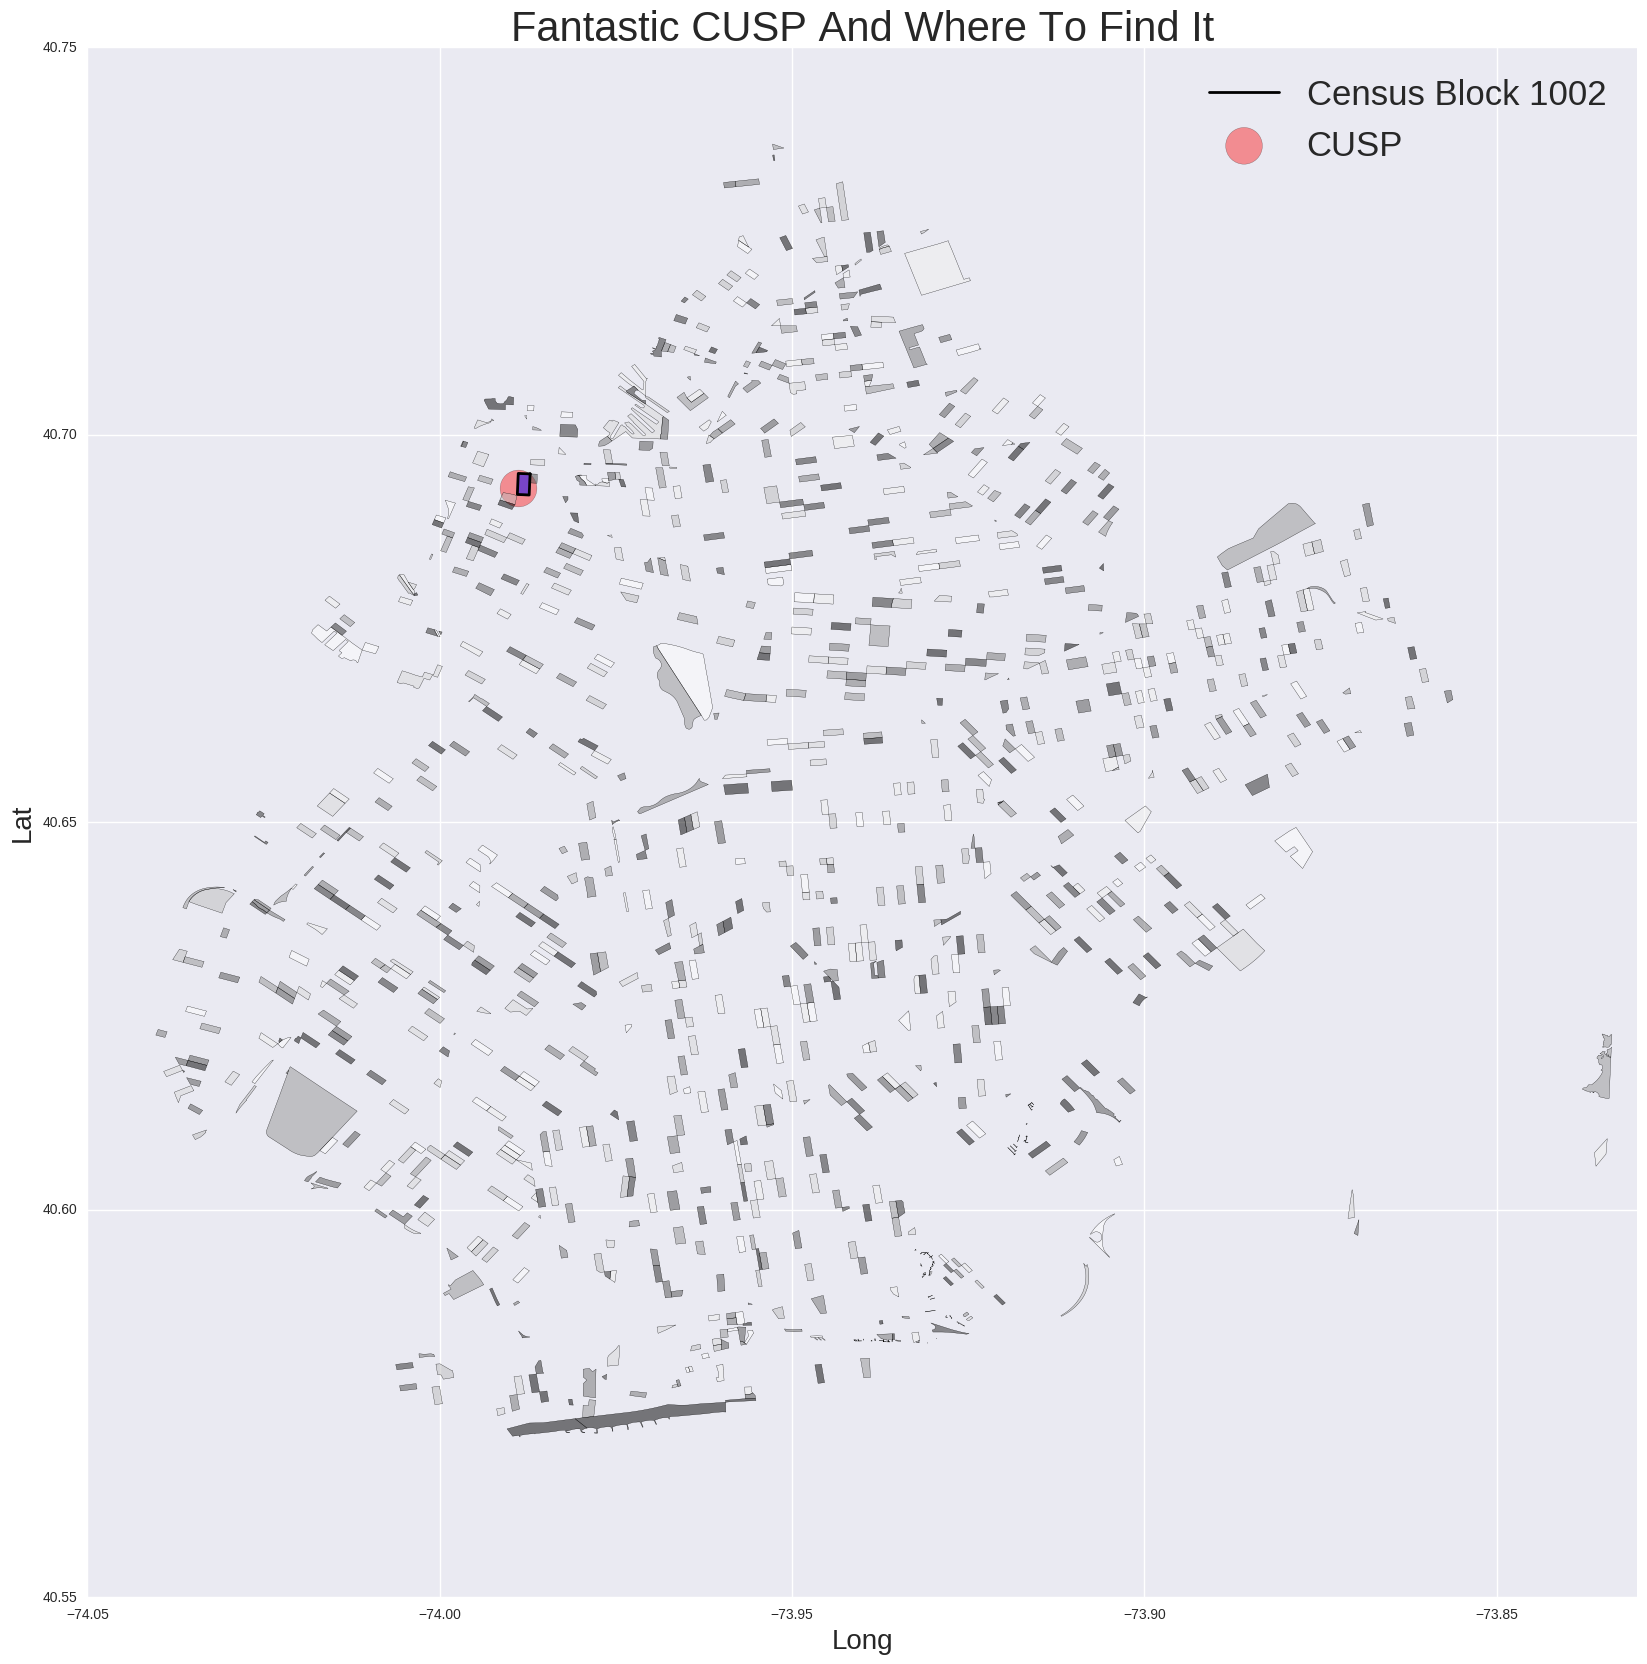

In [32]:
f, ax = pl.subplots(figsize=(20,20))
cb_bk_plot.plot(ax=ax, linewidth=0.2)
ax.scatter(-73.9888305, 40.6931259, marker='o', s=700, c='red', alpha=0.4, label='CUSP')
ax.set_xlim(-74.05, -73.83)
cb_CUSP.plot(ax=ax, color='blue', label="Census Block 1002", linewidth=2)
ax.legend(fontsize=25)
ax.set_title("Fantastic CUSP And Where To Find It", fontsize=30)
ax.set_xlabel("Long", fontsize=20)
ax.set_ylabel("Lat", fontsize=20)


### The red dot represent the CUSP and blue area is the census block that CUSP is in.